## Data Preparation of 2D images

In [3]:
%matplotlib inline 

#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [4]:
import numpy     as np
import pandas    as pd
from   scipy     import stats
import os
import matplotlib.pyplot as plt

import xyimg.dataprep as dp
import xyimg.cnn      as cnn


## Test

In [30]:
path = os.environ['LPRDATADIR']
dp.tests(path)

input  filename  /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_13bar_0nubb.h5
output filename  temp/sample1
projections      ('x', 'y')
widths           (10.0, 10.0)
frame            100.0
labels           ['esum', 'ecount', 'emean']
events           10
maximum window frame 89.00
image shape in bins  [10, 10]
output file  temp/sample1_xy_10x10_100
input  filename  /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_13bar_0nubb.h5
output filename  temp/sample1
projections      ('x', 'z')
widths           (10.0, 10.0)
frame            100.0
labels           ['esum', 'ecount', 'emean']
events           10
maximum window frame 89.00
image shape in bins  [10, 10]
output file  temp/sample1_xz_10x10_100
input  filename  /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_13bar_0nubb.h5
output filename  temp/sample1
projections      ('x', 'y', 'z')
widths           (10.0, 10.0, 10.0)
frame            100.0
labels           ['esum', 'ecount', 'emean']
events          

True

In [37]:
path  = os.environ["LPRDATADIR"]
opath = path+'xymm/'

def production(pressure, coors, widths, frame, labels, nevents = -1):
    ofiles = []
    for sample in ('0nubb', '1eroi'):
        ifile = path + dp.voxel_filename(pressure, sample)
        ofile = opath+sample+'_'+str(pressure)
        dp.run(ifile, ofile, coors, widths = widths, frame = frame, labels = labels, nevents = nevents)
        ofiles.append(dp._ofile(ofile, coors, widths, frame)+'.npz')
    ofile = dp._ofile(opath+'xymm_'+str(pressure), coors, widths, frame)
    dp.mix_godata(*ofiles, ofile)
    for ofile in ofiles: os.remove(ofile)
    return True



In [41]:
pressure = '13bar'
coors    = ('x', 'y')
widths   = (10, 10)
frame    = 100
labels   = ['esum', 'emax', 'ecount', 'emean', 'estd', 'zmean', 'zstd']
nevents  = -1
production(pressure, coors, widths, frame, labels, nevents)

input  filename  /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_13bar_0nubb.h5
output filename  /scratch/next/data/NEXT100/pressure_topology/xymm/0nubb_13bar
projections      ('x', 'y')
widths           (10, 10)
frame            100
labels           ['esum', 'emax', 'ecount', 'emean', 'estd', 'zmean', 'zstd']
events           -1
maximum window frame 89.00
image shape in bins  [10, 10]


In [18]:
dp.test_mix_godata('temp/sample1_xy_10x10.npz', 'temp/sample2_xy_10x10.npz', 'temp/test_')

input file 1  temp/sample1_xy_10x10.npz
input file 2  temp/sample2_xy_10x10.npz
(10, 3, 9, 9) (10, 3, 10, 10)
(10, 2, 9, 9) (10, 2, 10, 10)
x  [[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   7.66173374e-02 1.65048527e-01 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   1.07859779e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   4.77742506e-02 2.28102409e-01 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.54379985e-02
   1.54776861e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.0

/home/jahernando/NEXT/software/nextnn/xyimg/dataprep.py:329: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  #xfs = np.array([wi[4] for wi in ww])


ValueError: could not broadcast input array from shape (3,10,10) into shape (3,)

In [112]:
path     =  os.environ['LPRDATADIR']
pressure = '13bar'
sample   = '1eroi'
ifile    = path + dp.voxel_filename(pressure, sample)
labels   = [] 

coors  = ('x', 'y', 'z')
widths = (10., 10., 10.)
dp.run(ifile, 'temp/temp', coors, widths)

True

In [113]:
odata = dp.load('temp/temp_xyz_10x10x10.npz')

FileNotFoundError: [Errno 2] No such file or directory: 'temp/temp_xyz_10x10x10.npz'

In [105]:
odata.xdic['esum'][0][6]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.01350436,
        0.07304119, 0.05898047, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.03722389, 0.12710535,
        0.00670292, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00152597, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [2]:
path     =  os.environ['LPRDATADIR']
pressure = '5bar'
sample   = '1eroi'
ifile    = path + dp.voxel_filename(pressure, sample)

coors  = ('x', 'y')
widths = (20, 20)
labels = ['esum', 'emax', 'emean', 'ecount', 'zmean', 'estd']
odata  = dp.run(ifile, 'temp/temp', coors, widths, labels, 10, verbose = True)

NameError: name 'os' is not defined

In [121]:
odata = dp.load('temp/temp_xy_10x10.npz')

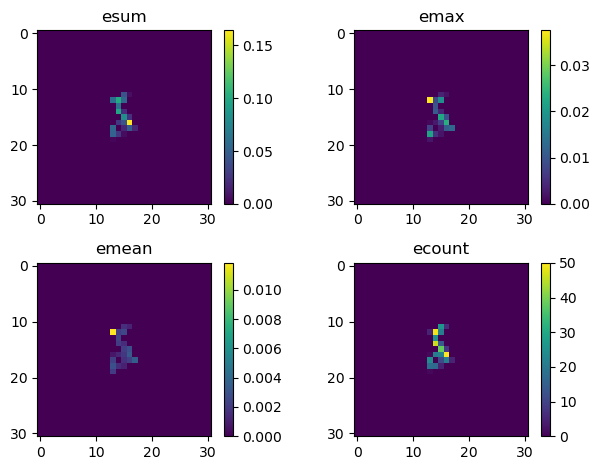

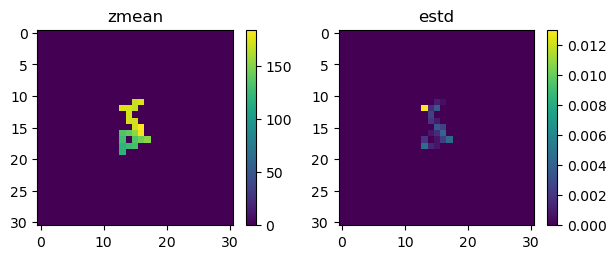

<Figure size 640x480 with 0 Axes>

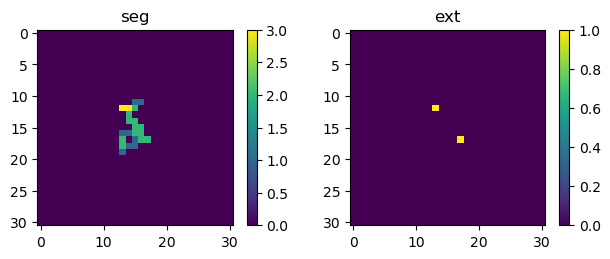

<Figure size 640x480 with 0 Axes>

In [123]:
dp.plot_imgs(odata.xdic, 1)
dp.plot_imgs(odata.zdic, 1)

In [38]:
path     =  os.environ['LPRDATADIR']
pressure = '13bar'
sample   = '1eroi'
ifile    = path + dp.voxel_filename(pressure, sample)
idata    = pd.read_hdf(ifile, "voxels") 


In [41]:
delta = dp.frame(idata)
print(delta)

(100, 100, 99)


In [49]:
dp.arange_include_endpoint(0, 10, 0.3)

array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ,
        3.3,  3.6,  3.9,  4.2,  4.5,  4.8,  5.1,  5.4,  5.7,  6. ,  6.3,
        6.6,  6.9,  7.2,  7.5,  7.8,  8.1,  8.4,  8.7,  9. ,  9.3,  9.6,
        9.9, 10.2])

In [39]:
pressure =  '13bar'
type     = 'levels'
bins     = (8, 8)
labels   = ['esum', 'emax', 'ecount']
nevents  = 10
ifile    = '/scratch/next/data/NEXT100/pressure_topology/voxel_dataset_13bar_0nubb.h5'
ofile    = 'sample1'
odata    = dp.run(ifile, ofile, xyimg_type = type, bins = bins, labels = labels, nevents = nevents);
ifile    = '/scratch/next/data/NEXT100/pressure_topology/voxel_dataset_13bar_0nubb.h5'
ofile    = 'sample2'
odata    = dp.run(ifile, ofile, xyimg_type = type, bins = bins, labels = labels, nevents = nevents);

Input voxel file: /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_13bar_0nubb.h5
Output file :  sample1
Input voxel file: /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_13bar_0nubb.h5
Output file :  sample2


In [43]:
dp.mix_godata('sample1.npz', 'sample2.npz', 'sample_mix')

input file 1  sample1.npz
input file 2  sample2.npz
Output file :  sample_mix


GoData(xdic={'esum': array([[[0.17504443, 0.01912799, 0.00707912, ..., 0.        ,
         0.        , 0.        ],
        [0.02196727, 0.00636552, 0.00213901, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.07934775, 0.03140299, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.01889797, 0.0195063 , 0.        , ..., 0.02657022,
         0.01886864, 0.1986755 ],
        [0.03181773, 0.0037635 , 0.        , ..., 0.01355275,
         0.00565201, 0.01263033],
        [0.00511986, 0.01809627, 0.0510077 , ..., 0.00541131,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.17862678, 0.0576491 ],
        [0.        , 0.        , 0.        , ..., 0.05509835,
         0.00410459, 0.        ],
        [0.        , 0.        , 0.        , ..., 0.0529193 ,
         0.00566448, 0.        ],
        ...,
        [0.        , 0.02426542, 0.01317913, ..., 0.02017171,
         0.02579284, 0.  

In [54]:
ifile = '/scratch/next/data/NEXT100/pressure_topology/xyimg/xyimg_projections_13bar_8x8.npz'
odata = np.load(ifile)

In [56]:
odata['xf']

KeyError: 'xf is not a file in the archive'

In [57]:
list(odata.keys())

['x', 'y', 'z', 'id', 'xlabel', 'zlabel']

In [18]:
odata.xf

array([[ 39.        ,  34.        ,  27.        ,   0.97113425],
       [ 24.        ,  27.        ,  33.        ,   0.97719107],
       [ 44.        ,  28.        ,  32.        ,   1.        ],
       [ 18.        ,  26.        ,  60.        ,   1.        ],
       [ 41.        ,  17.        ,  41.        ,   0.98788393],
       [ 62.        ,  24.        ,  42.        ,   0.9647785 ],
       [ 23.        ,  36.        ,   8.        ,   1.        ],
       [ 28.        ,  35.        ,  26.        ,   0.9624463 ],
       [ 43.        ,  88.        , 105.        ,   0.98788393],
       [ 33.        ,  18.        ,  29.        ,   1.        ]])

In [6]:
#import xyimg.dataprod as dprod

In [7]:
#pressure = '1bar'
#sample   = '0nubb'
#ifilename1 = xyimg.path + xyimg.voxel_filename(pressure, sample)
#xyimg.test_run_xyimg_z(ifilename1, 'test_sample1')

## Plots 

In [18]:
path = os.environ['LPRDATADIR']
type     = 'levels'
pressure = '13bar'
sbins    = '8x8'
ifile = 'xyimg/xyimg_'+type+'_'+pressure+'_'+sbins+'.npz'
odata = dp.load(path + ifile)

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/next/data/NEXT100/pressure_topology/xyimg/xyimg_levels_13bar_8.npz'

In [16]:
odata = dp.load(path + ifile)

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/next/data/NEXT100/pressure_topology/xyimg/xyimg_levels_3bar_8.npz'

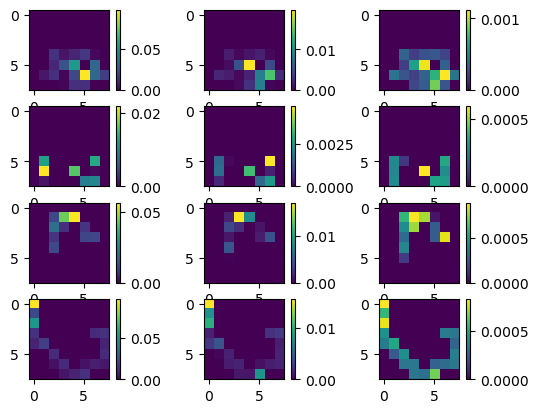

In [64]:
plt.figure()
for i in range(3):
    for j in range(4):
        plt.subplot(4, 3, 3*j + i + 1)
        plt.imshow(xi[i][:, :, j])
        plt.colorbar();

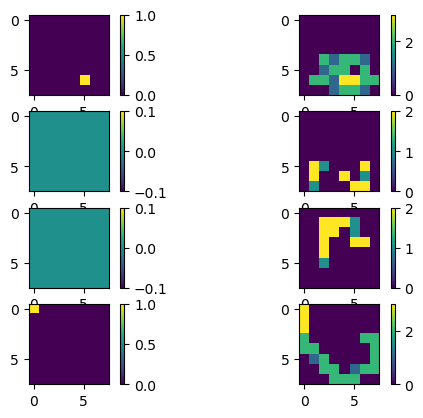

In [65]:
plt.figure()
for i in range(2):
    for j in range(4):
        plt.subplot(4, 2, 2*j + i + 1)
        plt.imshow(zi[i][:, :, j])
        plt.colorbar();

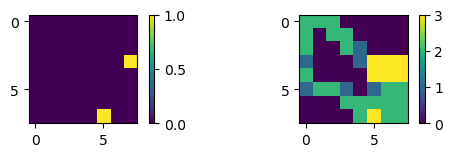

In [37]:
plt.figure()
for i in range(1):
    for j in range(2):
        plt.subplot(3, 2, 2*i + j + 1)
        plt.imshow(zi[2*i + j])
        plt.colorbar();

## Code

## Run several 


In [6]:
def production(pressures, samples, bins, coors, labels, nevents = -1):
    for pressure in pressures:
        for sample in samples:
            print('processing ', pressure, ', ', sample)
            ifile = xyimg.path + xyimg.voxel_filename(pressure, sample)
            ofile = 'xyimg_'+str(pressure)+'_'+str(sample)+'_'+str(bins[0])
            xyimg.run(ifile, ofile, bins = bins, coors = coors, labels = labels, nevents = nevents)
    return

In [41]:
pressures = ["13bar","5bar"]
samples   = ['0nubb', '1eroi']
bins      = (8, 8)
coors     = ('x', 'y')
labels    = ['esum', 'ecount', 'emax', 'emean', 'estd', 'zmean', 'zstd']
nevents   = -1

In [ ]:
production(pressures, samples, bins, coors, labels, nevents)

In [57]:
def mix(pressures, widths):
    for pressure in pressures:
        for width in widths:
            file1 = 'xyimg_'+str(pressure)+'_0nubb_'+str(width)+'.npz'
            file2 = 'xyimg_'+str(pressure)+'_1eroi_'+str(width)+'.npz'
            ofile = 'xyimg_'+str(pressure)+'_'+str(width)
            xyimg.mix_godata(xyimg.path + file1, xyimg.path + file2, ofile)

In [62]:
pressures = ["1bar","2bar"]
widths    = [16, 32]

In [63]:
mix(pressures, widths)

x labels  ['esum', 'ecount', 'emax', 'emean', 'estd', 'zmean', 'zstd']
z labels  ['ext', 'seg']
image shapes  (15774, 7, 16, 16)
Output file :  xyimg_1bar_16
x labels  ['esum', 'ecount', 'emax', 'emean', 'estd', 'zmean', 'zstd']
z labels  ['ext', 'seg']
image shapes  (15774, 7, 32, 32)
Output file :  xyimg_1bar_32
x labels  ['esum', 'ecount', 'emax', 'emean', 'estd', 'zmean', 'zstd']
z labels  ['ext', 'seg']
image shapes  (13549, 7, 16, 16)
Output file :  xyimg_2bar_16
x labels  ['esum', 'ecount', 'emax', 'emean', 'estd', 'zmean', 'zstd']
z labels  ['ext', 'seg']
image shapes  (13549, 7, 32, 32)
Output file :  xyimg_2bar_32


## Test

In [47]:
xyimg.tests()

Input voxel file: /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_13bar_0nubb.h5
Input voxel file: /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_13bar_0nubb.h5
Output file :  test_0nubb
Input voxel file: /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_13bar_1eroi.h5
Input voxel file: /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_13bar_1eroi.h5
Output file :  test_1eroi
x labels  ['esum', 'ecount', 'emean', 'emax', 'estd']
z labels  ['ext', 'seg']
shape x   (10, 5, 8, 8) (10, 5, 8, 8)
shape y   (10, 1) (10, 1)
shape z   (10, 2, 8, 8) (10, 2, 8, 8)
shape id  (10, 2) (10, 2)
image shapes  (10, 5, 8, 8)
shape xs   20 (5, 8, 8)
shape ys   20 (1,)
shape zs   20 (5, 8, 8)
shape ids  20 (2,)
Output file :  test_13bar
Passed all tests!


True

## Plots

[1]


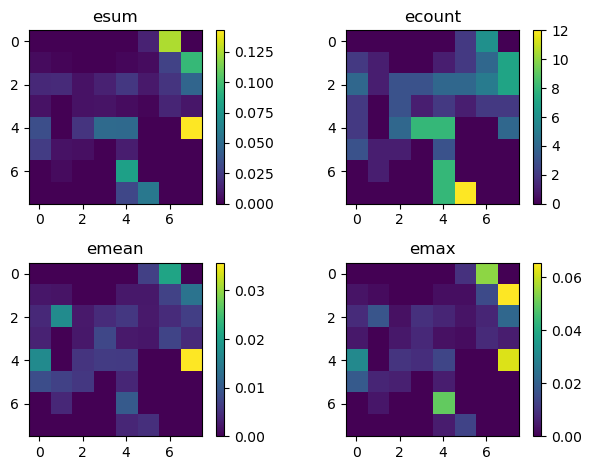

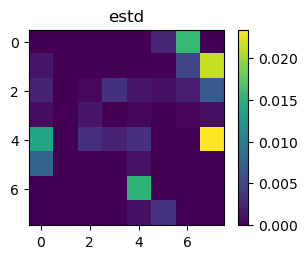

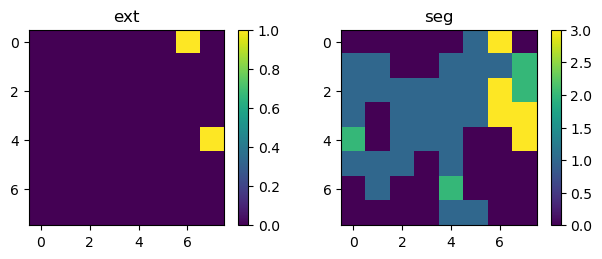

<Figure size 640x480 with 0 Axes>

In [52]:
odata = xyimg.load('test_13bar.npz')
ievt = 2
print(odata.y[ievt])
xyimg.plot_imgs(odata.xdic, ievt)
xyimg.plot_imgs(odata.zdic, ievt)

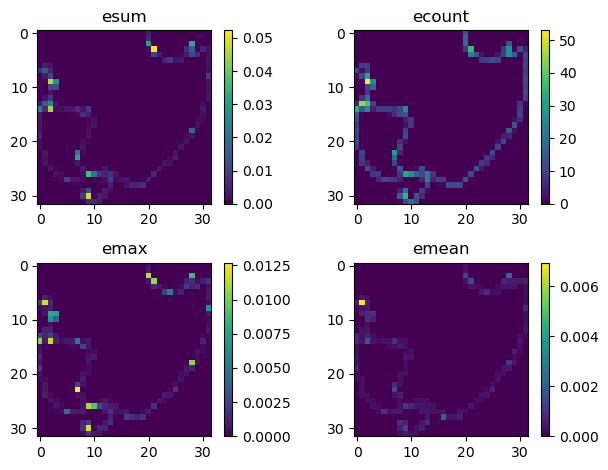

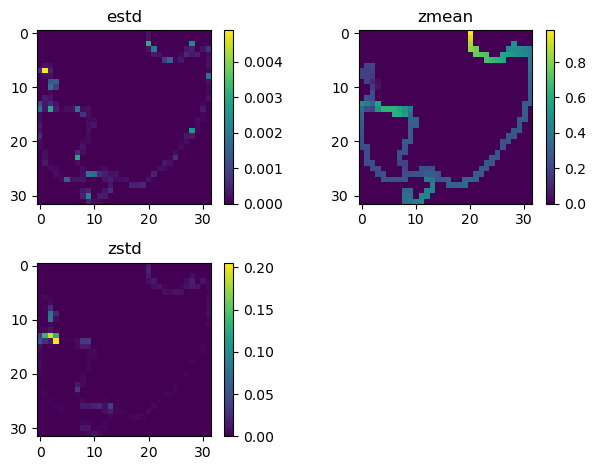

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

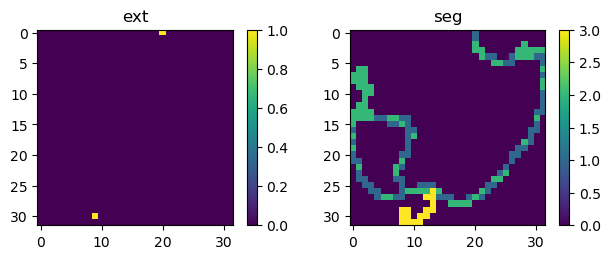

<Figure size 640x480 with 0 Axes>

In [38]:
odata = xyimg.load('xyimg_1bar_1eroi_32.npz')
ievt = 1
xyimg.plot_imgs(odata.xdic, ievt)
xyimg.plot_imgs(odata.zdic, ievt)